In [2]:
!pip install tensorflow

  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/3c/e3/e868f1d5951047f950d2ba1e04a765a3328a51f06996b67976d6102f8227/tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata
  Using cached tensorflow-2.19.0-cp311-cp311-win_amd64.whl.metadata (4.1 kB)
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/8f/aa/ba0014cc4659328dc818a28827be78e6d97312ab0cb98105a770924dc11e/absl_py-2.3.1-py3-none-any.whl.metadata
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Obtaining dependency information for astunparse>=1.6.0 from https://files.pythonhosted.org/packages/2b/03/13dde6512ad7b4557eb792fbcf0c653af6076b81e5941d36ec61f7ce6028/astunparse-1.6.3-py2.py3-none-any.whl.metadata
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Obtaining dependency information for flatbuffers>=24.3.25 from https://files.pythonhosted.org/packages/b8/25/155f9f080d5e4bc0082edfda032ea2bc2b8fab3f


[notice] A new release of pip is available: 23.2.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
from tensorflow import keras
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
import os
from datetime import datetime 

In [4]:
data=pd.read_csv("MicrosoftStock.csv")

In [5]:
print(data.head())

    index        date   open   high    low  close    volume  Name
0  390198  2013-02-08  27.35  27.71  27.31  27.55  33318306  MSFT
1  390199  2013-02-11  27.65  27.92  27.50  27.86  32247549  MSFT
2  390200  2013-02-12  27.88  28.00  27.75  27.88  35990829  MSFT
3  390201  2013-02-13  27.93  28.11  27.88  28.03  41715530  MSFT
4  390202  2013-02-14  27.92  28.06  27.87  28.04  32663174  MSFT


In [6]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   index   1259 non-null   int64  
 1   date    1259 non-null   object 
 2   open    1259 non-null   float64
 3   high    1259 non-null   float64
 4   low     1259 non-null   float64
 5   close   1259 non-null   float64
 6   volume  1259 non-null   int64  
 7   Name    1259 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 78.8+ KB
None
               index         open         high          low        close  \
count    1259.000000  1259.000000  1259.000000  1259.000000  1259.000000   
mean   390827.000000    51.026394    51.436007    50.630397    51.063081   
std       363.586303    14.859387    14.930144    14.774630    14.852117   
min    390198.000000    27.350000    27.600000    27.230000    27.370000   
25%    390512.500000    40.305000    40.637500    39.870000    40.310000   


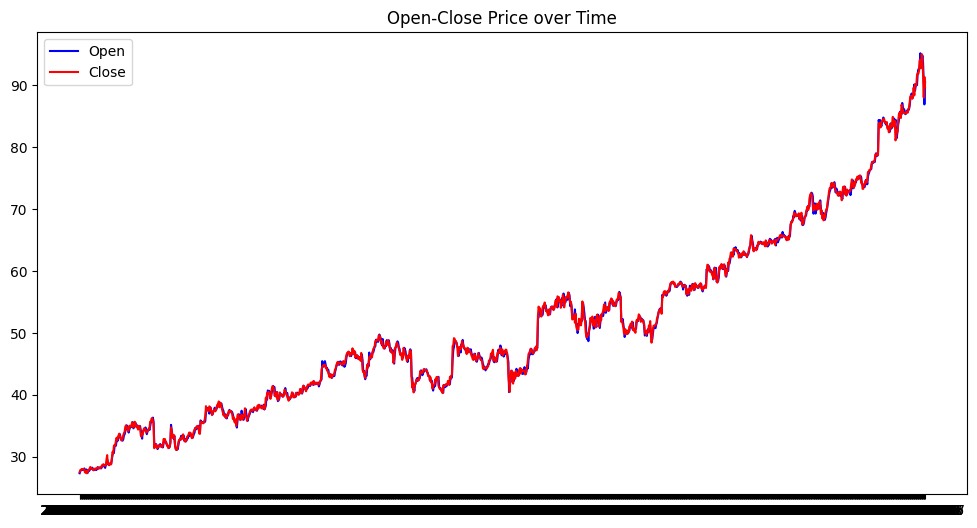

In [7]:
plt.figure(figsize=(12,6))
# open and close prices
plt.plot(data["date"],data["open"],label="Open",color="blue")
plt.plot(data["date"],data["close"],label="Close",color="red")
plt.title("Open-Close Price over Time")
plt.legend()
plt.show() 

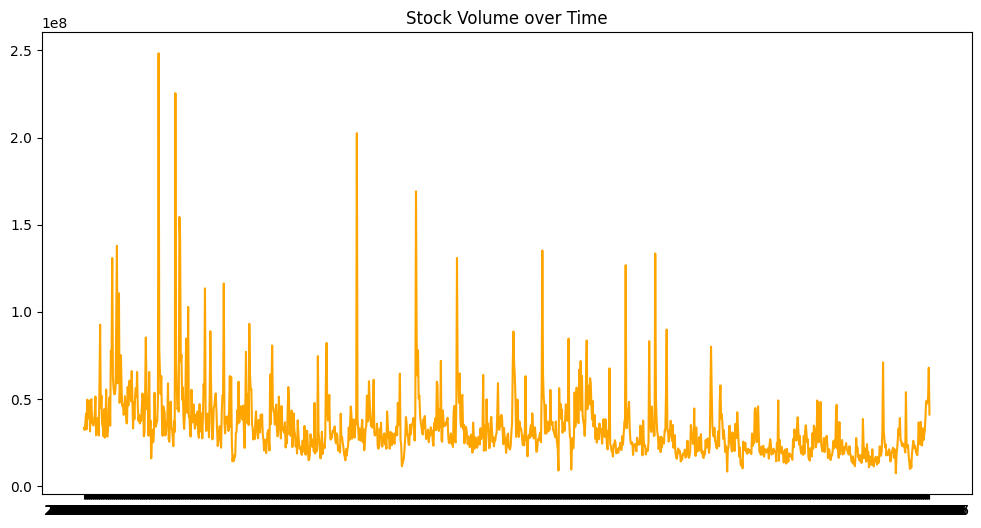

In [8]:
# Trading Volume (checking for outliers)
plt.figure(figsize=(12,6))
plt.plot(data["date"],data["volume"],label="Volume",color="orange")
plt.title("Stock Volume over Time")
plt.show()

In [9]:
# droping none numeric data 

numeric_data=data.select_dtypes(include=["int64","float64"])

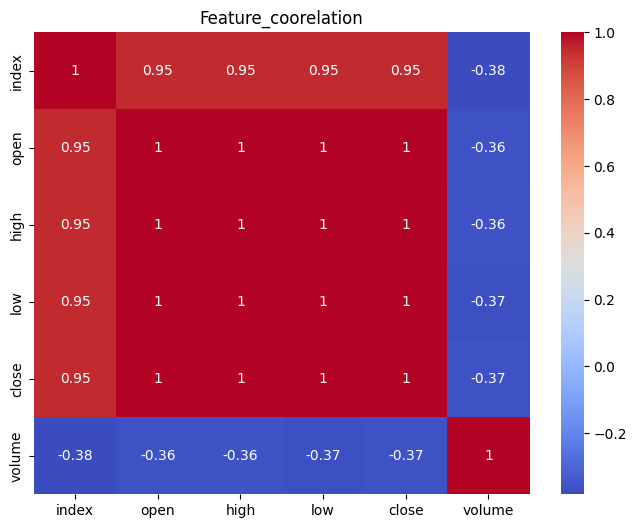

In [10]:

# checkin coorelation between features
plt.figure(figsize=(8,6))
sns.heatmap(numeric_data.corr(),annot=True,cmap="coolwarm")
plt.title("Feature_coorelation")
plt.show()

In [11]:
data["date"]=pd.to_datetime(data["date"])

prediction=data.loc[
    (data["date"]> datetime(2013,1,1))&
    (data["date"]< datetime(2018,1,1))
]

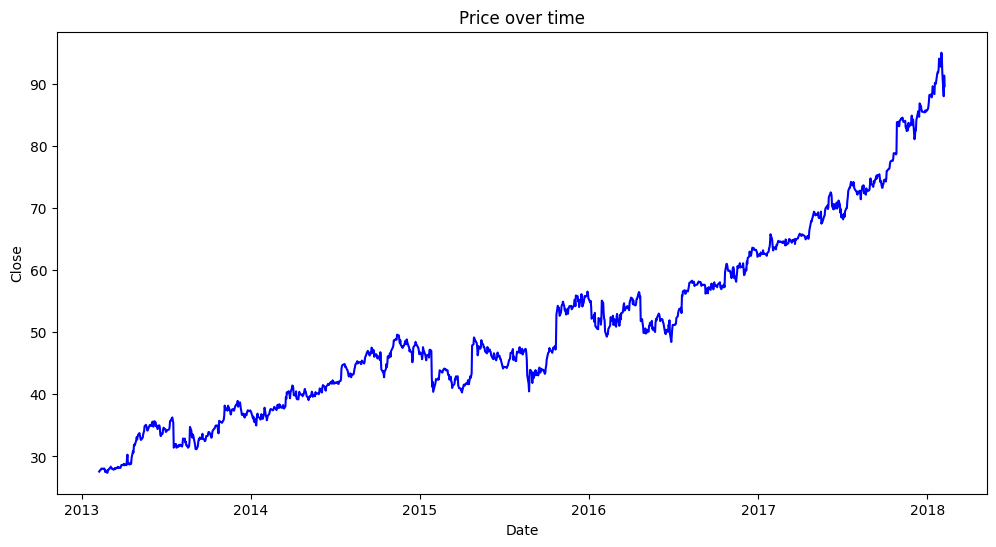

In [12]:
plt.figure(figsize=(12,6))
plt.plot(data["date"],data["close"],color="blue")
plt.xlabel("Date")
plt.ylabel("Close")
plt.title("Price over time")
plt.show()


In [13]:
stock_close=data.filter(["close"])
dataset=stock_close.values #convert to numpy array
training_data_len=int(np.ceil(len(dataset))* 0.95)

In [14]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(dataset)

In [15]:
training_data=scaled_data[:training_data_len]

In [16]:
X_train,y_train=[],[]

for i in range(60,len(training_data)):
    X_train.append(training_data[i-60:i,0])
    y_train.append(training_data[i,0])

X_train,y_train=np.array(X_train),np.array(y_train)
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

In [17]:
model=keras.models.Sequential()

model.add(keras.layers.LSTM(64,return_sequences=True,input_shape=(X_train.shape[1],1)))
model.add(keras.layers.LSTM(64,return_sequences=False))
model.add(keras.layers.Dense(128,activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(1))

model.summary()
model.compile(optimizer="adam",
              loss="mae",
              metrics=[keras.metrics.RootMeanSquaredError()])

c:\Users\gacha\PycharmProjects\Local_sentiment_analyser\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 60, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,369 (228.00 KB)

 Trainable params: 58,369 (228.00 KB)

 Non-trainable params: 0 (0.00 B)

In [18]:
training=model.fit(X_train,y_train,epochs=20,batch_size=32)
test_data=scaled_data[training_data_len-60:]
X_test,y_test=[],dataset[training_data_len:]

for i in range(60,len(test_data)):
    X_test.append(test_data[i-60:i,0])

X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

Epoch 1/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 7s 52ms/step - loss: 0.2419 - root_mean_squared_error: 0.3616
Epoch 2/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.1332 - root_mean_squared_error: 0.1854
Epoch 3/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 57ms/step - loss: 0.1227 - root_mean_squared_error: 0.1668
Epoch 4/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 72ms/step - loss: 0.1196 - root_mean_squared_error: 0.1617
Epoch 5/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 70ms/step - loss: 0.1153 - root_mean_squared_error: 0.1545
Epoch 6/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 60ms/step - loss: 0.1111 - root_mean_squared_error: 0.1533
Epoch 7/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - loss: 0.1076 - root_mean_squared_error: 0.1480
Epoch 8/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.1020 - root_mean_squared_error: 0.1379
Epoch 9/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - loss: 0.1106 - root_mean_squared_error: 0.1531
Epoch 10/20
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - loss: 0.1019 - root_mean_squared_error: 0.1374

In [19]:
predictions=model.predict(X_test)
predictions=scaler.inverse_transform(predictions)

train=data[:training_data_len]
test=data[training_data_len:]
test=test.copy()
test["Predictions"]=predictions

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step


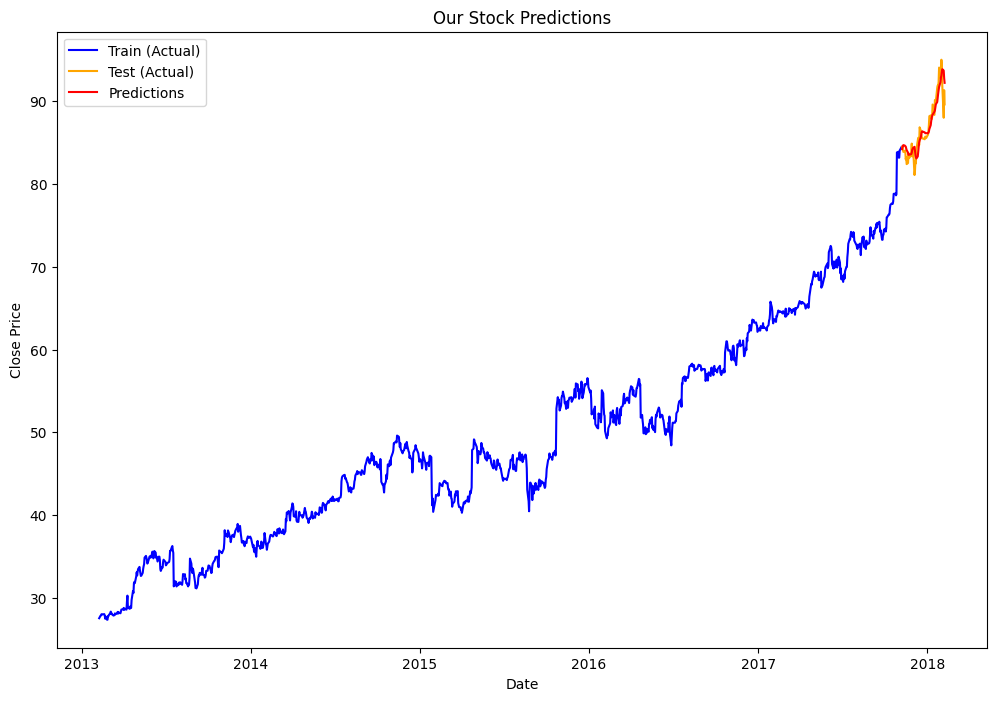

In [20]:
plt.figure(figsize=(12,8))
plt.plot(train["date"],train["close"],label="Train (Actual)",color="blue")
plt.plot(test["date"],test["close"],label="Test (Actual)",color="orange")
plt.plot(test["date"],test["Predictions"],label="Predictions",color="red")
plt.title("Our Stock Predictions")
plt.xlabel("Date")
plt.ylabel("Close Price")
plt.legend()
plt.show()